In [1]:
%pylab inline

from IPython.display import clear_output
import copy
import pickle
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [2]:
#dictionary som används för att översätta spelare till brädmarkering 
markerMapping = {0:".",1:"O", 2:"X"}
print(markerMapping)

{0: '.', 1: 'O', 2: 'X'}


In [3]:
#Metod för att generera en tom spelplan
def emptyboard():
    return [0,0,0,0,0,0,0,0,0]

print(emptyboard())

[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
#Metod som returnerar möjliga drag på ett tomt bräde
def getDefultPosibleMoves():
    return [0,1,2,3,4,5,6,7,8]

In [5]:
#metod som kollar om någon vunnit, returnerar True vid vinst, annars False
def testWin(board):
    if((board[0] == board[1] == board[2] ==1) or (board[3] == board[4] == board[5] ==1) or (board[6] == board[7] == board[8] ==1)):
        return True
    elif((board[0] == board[1] == board[2] ==2) or (board[3] == board[4] == board[5] ==2) or (board[6] == board[7] == board[8] ==2)):
        return True
    elif((board[0] == board[3] == board[6] ==1) or (board[1] == board[4] == board[7] ==1) or (board[2] == board[5] == board[8] ==1)):
        return True
    elif((board[0] == board[3] == board[6] ==2) or (board[1] == board[4] == board[7] ==2) or (board[2] == board[5] == board[8] ==2)):
        return True
    elif((board[0] == board[4] == board[8] ==1) or (board[2] == board[4] == board[6] ==1)):
        return True
    elif((board[0] == board[4] == board[8] ==2) or (board[2] == board[4] == board[6] ==2)):
        return True
    else:
        return False

print(testWin([2,0,1,
               0,2,2,
               2,0,2]))

True


In [6]:
#Hjälpmetoder för att printa en board  

def printIndexRow():
    print("    0   1   2   ")

def printSolidRow():
    print("  -------------")

def printSectionSplitter():
    print("  ----+---+----")

def printRow(row, index):
    if(len(row) != 3):
        print("Fel rad längd")
        return
    print(index,"|",row[0], "|", row[1], "|", row[2], "|")


In [7]:
#metod som printar en board 
def showBoard(board):
    
    printIndexRow()
    printSolidRow()
    index =0
    for rowIndex in range(0,9,3):
        row = [markerMapping[board[(rowIndex)]], markerMapping[board[(rowIndex+1)]], markerMapping[board[rowIndex+2]]]
        printRow(row, index)
        index = index+1
        
        if rowIndex <=3 :
            printSectionSplitter()                     
        else:
            printSolidRow()
                
showBoard(emptyboard())


    0   1   2   
  -------------
0 | . | . | . |
  ----+---+----
1 | . | . | . |
  ----+---+----
2 | . | . | . |
  -------------


In [8]:
#Klass som representerar en spelare 
class Player:
    def __init__(self, name):
        self.name= name
       
    def set_marker(self,marker):
        self.marker = marker
    
    def get_marker(self):
        return self.marker

test = Player("Hans")
test.set_marker(1)
print(test.get_marker())

1


In [9]:
#Metod som översätter tangentbordsinmatnig till ett drag på spelplanen (ett index)

#     0   1   2   
#   -------------
# 0 | . | . | . |
#   ----+---+----
# 1 | . | . | . |
#   ----+---+----
# 2 | . | . | . |
#   -------------

def convert_input(data):
    try:        
        data = data.split(",")
        data[0] = int(data[0])
        data[1] = int(data[1])
        #2,2 -> 8 ; 1,1 -> 4
        return True, (3*data[0])+data[1]
    except:
        print("Ogiltig indata!")
        return False, -1

print(convert_input("1,2"))

(True, 5)


In [10]:
#Läser in perfectPolicy från fil
perfectPolicy=pickle.load(open("perfectPolicy.p","rb"))
print(perfectPolicy[(0,0,0,0,0,0,0,0,0)])

[0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
#metod som genererar en random strategy
def makeRandomStrategy():
    
    #Metod som kollar möjliga drag på ett givet bräde och returnerar en lista med möjliga drag
    def getAllMoves(board):
        ret=[]
        for i in range(9):
            if board[i]==0:
                ret.append(i)
        return ret
    
    #metod som sätter en given spelarmarkering på en given plats på ett givet bräde och returnrar ett uppdaterat bräde 
    def doMove(board,move,who):
        newBoard=copy.deepcopy(board)
        newBoard[move]=who
        return newBoard

    randomStrategy=dict()

    #metod som sparar alla möjliga drag under ett tick tack toe spel som Key i en dictionary 
    #och som tillhörade värde sparas en lista med sanolikheter för ett specifikt motdrag
    #returnerar den färdiga dictionaryn (strategin) 
    def addPossibleBoards(board,who):
        #showBoard(board)
        moves=getAllMoves(board)
        V=numpy.ones(len(moves))
        V=V/V.sum()
        if testWin(board)==False and list(board).count(0)!=0:
            randomStrategy[tuple(board)]=V
        flipMove=[0,2,1]
        for move in moves:
            newBoard=doMove(board,move,who)
            addPossibleBoards(newBoard,flipMove[who])

    board=emptyboard()
    addPossibleBoards(board,1)
    print("randomStrategy len:",len(randomStrategy))

    return randomStrategy

In [12]:
#Metod som låter två personer spela mot varandra
def multyPlayer(): 
    board = emptyboard()
    players =[]
    posibleMoves = getDefultPosibleMoves()
    play = True

    for i in range(2):
        players.append(Player(input(f"Ange namn på spelare {i+1}: ")))
        players[i].set_marker(i+1)

    showBoard(board)

    while(play):
        for player in players:

            noLegalMove = True

            while(noLegalMove):

                success, move = convert_input(input(f"{player.name} var vill du sätta din markering? (rad, kolumn): "))

                if(success and move in posibleMoves):
                    posibleMoves.remove(move)
                    board[move] = player.get_marker()
                    showBoard(board)
                    noLegalMove = False
                else:
                    print("Ogiltigt drag!")

            if(testWin(board)):
                print(f"{player.name} van!")
                play = False
                break

            if(len(posibleMoves) == 0):
                print("Slut på drag!")
                print("Oavgjort!!")
                play = False
                break

In [13]:
#Metod som låter en person spela mot en strategi
def singelVsPolicy(policy = perfectPolicy): 
    # Initierar spelet, skapar upp variabler som behövs. te.x en board, spelarlista och möjliga drag.   
    board = emptyboard()
    players =[]
    posibleMoves = getDefultPosibleMoves()
    play = True

    # Läser in människans spelarnamn och tilldelar "1" som spelarmarkering.
    players.append(Player(input(f"Ange namn på spelare 1: ")))
    players[0].set_marker(1)
    
    # tilldelar namn och "2" som spelarmarkering till AI:n.
    players.append(Player("Ai"))
    players[1].set_marker(2)
    
    showBoard(board)

    while(play):
        for player in players:

            noLegalMove = True

            while(noLegalMove):#Så länge inget giltigt drag har gjorts, så ber vi aktuell spelare att göra ett giltigt drag
            
                if player.name != "Ai":
                    # Löser av spelarens drag och konverterar det till ett boardindex.
                    success, move = convert_input(input(f"{player.name} var vill du sätta din markering? (rad, kolumn): "))

                    if(success and move in posibleMoves): # Om giltigt drag
                        posibleMoves.remove(move) # Tar bort draget ur listan för tillgängliga drag.
                        board[move] = player.get_marker() # Sätter ut spelarmarkering på brädet för det index som valts.
                        noLegalMove = False # Bekräftar att det är ett giltigt drag.
                        showBoard(board)
                    else:
                        print("\nOgiltigt drag!\n")
                else:
                    print("\nbip bop, bip bop\n")

                    # Hämtar ut en lista med sannolikheter för ett motdrag givet ett specifikt board
                    probability = policy[tuple(board)] 
                    
                    # Baserat på sannolikheterna för ett visst motdrag, slumpas ett drag ur listan för tillgängliga drag
                    move=numpy.random.choice(posibleMoves,p=probability) 
                        
                    posibleMoves.remove(move) # Tar bort draget ur listan för tillgängliga drag.
                    board[move] = player.get_marker() # Sätter ut spelarmarkering på brädet för det index som valts.
                    noLegalMove = False # Bekräftar att det är ett giltigt drag.
                    showBoard(board)
                
            if(testWin(board)):# Kollar om aktuell spelare vunnit
                print(f"\n{player.name} vann!\n")
                play = False
                break

            if(len(posibleMoves) == 0): # Kollar om de är slut på drag för matchen.
                print("\nSlut på drag!")
                print("Oavgjort!!")
                play = False
                break

In [14]:
#Metod som spelar två strategier mot varandra
def playPolicyvsPolicy(pA,pB,runs,show=False):
    
    winner=[]
    
    for run in range(runs): 
    
        board = emptyboard()
        players =[]
        posibleMoves = getDefultPosibleMoves()
        play = True

        players.append(Player("Player pA"))
        players[0].set_marker(1)

        players.append(Player("Player pB"))
        players[1].set_marker(2)
        
        if show:
            showBoard(board)

        while(play):
            for player in players:      
                
                if show:
                    print(f"\n{player.name} bip bop, bip bop\n")

                if(player.name == "Player pA"):
                    probability = pA[tuple(board)]
                else:
                    probability = pB[tuple(board)]

                move=numpy.random.choice(posibleMoves,p=probability)
                posibleMoves.remove(move)
                board[move] = player.get_marker()
                if show:
                    showBoard(board)


                if(testWin(board)):
                    if show:
                        if(player.name == "Player pA" and show):
                            showBoard(board)
                            print(f"\n{player.name} vann!\n")
                    play = False
                    winner.append(player.get_marker())
                    break

                if(len(posibleMoves) == 0):
                    winner.append(0)
                    if show:
                        print("\nSlut på drag!")
                        print("Oavgjort!!")
                    play = False
                    break    
    return winner

In [15]:
#Metod som "tränar" parameter pB (policy) medhjälp av parameter pA (policy)
def trainPolicyB(pA,pB, runs):
    
    learnRate= 0.01 # "Belöning" för de drag som leder till vinst/oavgjort
    punishment= 0.001 # "Straff" för de drag som leder till förlust
    
    for run in range(runs):
        winner ="" # Variabel för att veta vem som vann.
        playedBoards={"pB":[] , "probabilityIndex":[]} # Historik för spelets boards och dess motdrag. Gäller endast pB.
        
        board = emptyboard()
        players =[]
        posibleMoves = getDefultPosibleMoves()
        play = True

        players.append(Player("Player pA"))
        players[0].set_marker(1)

        players.append(Player("Player pB"))
        players[1].set_marker(2)
        
        while(play):
            for player in players:
                
                if(player.name == "Player pB"):
                    probability = pB[tuple(board)]
                    playedBoards["pB"].append(copy.deepcopy(board)) # Kopierar nuvarande board till historiken.
                    move=numpy.random.choice(posibleMoves,p=probability) 
                    
                    #Sparar indexet som valdes ur possibleMoves till historiken.
                    playedBoards["probabilityIndex"].append(posibleMoves.index(move))
                else:
                    probability = pA[tuple(board)]    
                    move=numpy.random.choice(posibleMoves,p=probability)

    
                posibleMoves.remove(move)
                board[move] = player.get_marker()
                
                if(testWin(board)):
                    play = False
                    winner = player.name
                    break

                if(len(posibleMoves) == 0):
                    winner = "Oavgjort"
                    play = False
                    break 
        
        #tränar policyn efter varje avklarat spel. 
        
        if players[1].name in winner or "Oavgjort" in winner: 
        #Om "vi" vann eller spelade ovagjort så förstärks valen som ledde fram till resultatet
            for i in range(len(playedBoards["pB"])):
                index = playedBoards["probabilityIndex"][i] #
                board = playedBoards["pB"][i]
                prob = pB[tuple(board)]
                prob[index] += learnRate # Ökar sannolikheten för de drag som lett till vinst/draw
                prob/=prob.sum() # Normaliserar sannolikheterna efter redigering
        else:
        #Om "vi" förlorade så "straffas" valen som ledde fram till resultatet
            for i in range(len(playedBoards["pB"])):
                index = playedBoards["probabilityIndex"][i]
                board = playedBoards["pB"][i]
                prob = pB[tuple(board)]
                if ((prob[index] - punishment) >=0): # kollar att en förändring av sannolikheterna inte bli lägre än 0.
                    prob[index] -= punishment # Minskar sannolikheten för de drag som lett till förlust.
                    prob/=prob.sum() # Normaliserar sannolikheterna efter redigering.

In [16]:
#Metod som visualiserar statistik
def showStats(stats, nrOfGames):
    print("Wins: ",stats.count(2))
    print("Draws: ",stats.count(0))
    print("Losses: ", stats.count(1))
    print(f"Loss %: {(stats.count(1)/len(stats))*100}")

    plt.scatter(y=stats, x=range(nrOfGames))
    plt.title("Stats")
    plt.xlabel("Number of games")
    plt.ylabel("0= Draws                                 \n1= Losses                                \n2= Wins                                   ",rotation=0)
    plt.show()
    

In [17]:
#Skapar en variabel med en randomStrategy 
randomStrategy =makeRandomStrategy()

randomStrategy len: 4520


Wins:  0
Draws:  356
Losses:  9644
Loss %: 96.44


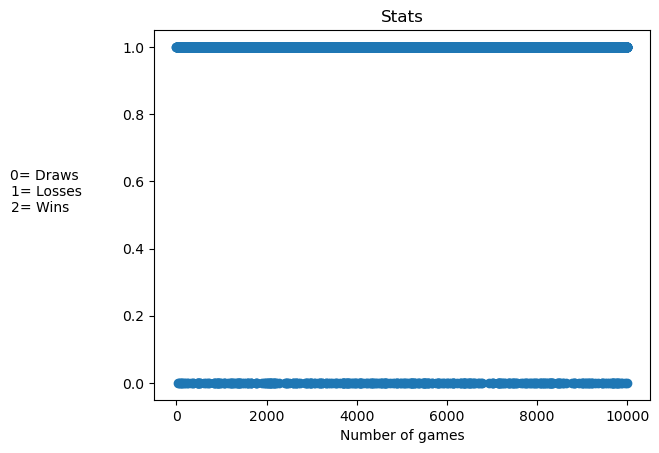

In [18]:
#Kopierar randomStrategy och spelar den mot perfectPolicy
testRuns = 10000
ourRandomStrat = copy.deepcopy(randomStrategy)
result = playPolicyvsPolicy(perfectPolicy,ourRandomStrat,testRuns)
showStats(result, testRuns)

In [19]:
#Kopierar randomStrategy till ourTrainedStrat och tränar den mot randomStrategy "runs" gånger
runs = 500000
ourTrainedStrat = copy.deepcopy(randomStrategy)
trainPolicyB(randomStrategy,ourTrainedStrat,runs)

Wins:  0
Draws:  9975
Losses:  25
Loss %: 0.25


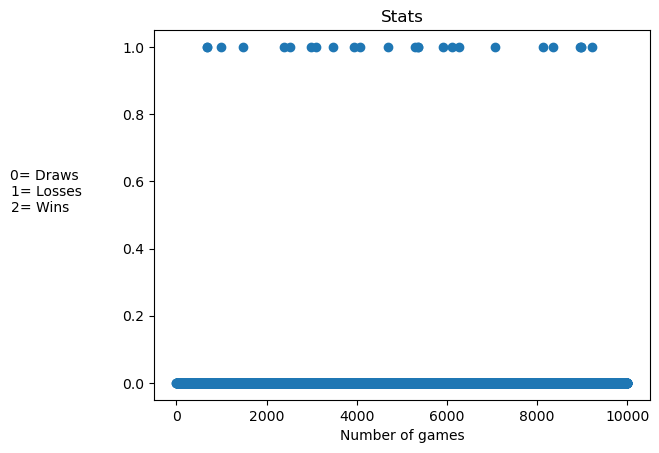

In [20]:
#Låter ourTrainedStrat spela "testRuns" antal spel mot perfectPolicy och visar uttfallet 
result = playPolicyvsPolicy(perfectPolicy,ourTrainedStrat,testRuns)
showStats(result, testRuns)

Wins:  6771
Draws:  3216
Losses:  13
Loss %: 0.13


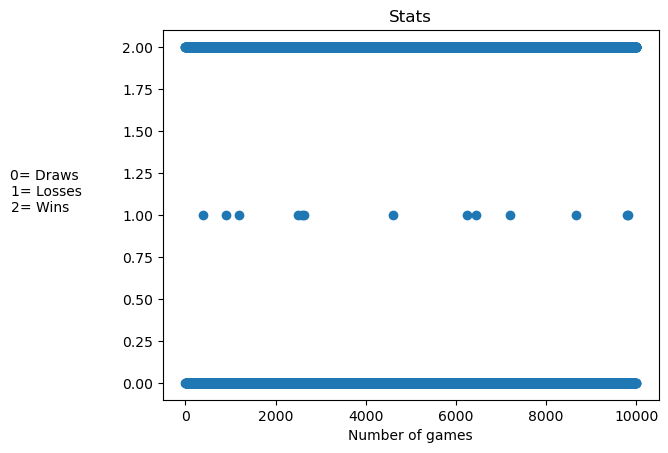

In [21]:
#Låter ourTrainedStrat spela "testRuns" antal spel mot randomStrategy och visar uttfallet
result = playPolicyvsPolicy(randomStrategy,ourTrainedStrat,testRuns)
showStats(result, testRuns)

In [22]:
singelVsPolicy(ourTrainedStrat)

Ange namn på spelare 1: vic
    0   1   2   
  -------------
0 | . | . | . |
  ----+---+----
1 | . | . | . |
  ----+---+----
2 | . | . | . |
  -------------
vic var vill du sätta din markering? (rad, kolumn): 1,1
    0   1   2   
  -------------
0 | . | . | . |
  ----+---+----
1 | . | O | . |
  ----+---+----
2 | . | . | . |
  -------------

bip bop, bip bop

    0   1   2   
  -------------
0 | . | . | X |
  ----+---+----
1 | . | O | . |
  ----+---+----
2 | . | . | . |
  -------------
vic var vill du sätta din markering? (rad, kolumn): 2,0
    0   1   2   
  -------------
0 | . | . | X |
  ----+---+----
1 | . | O | . |
  ----+---+----
2 | O | . | . |
  -------------

bip bop, bip bop

    0   1   2   
  -------------
0 | . | . | X |
  ----+---+----
1 | . | O | . |
  ----+---+----
2 | O | . | X |
  -------------
vic var vill du sätta din markering? (rad, kolumn): 1,2
    0   1   2   
  -------------
0 | . | . | X |
  ----+---+----
1 | . | O | O |
  ----+---+----
2 | O | . | X |
  ------

In [23]:
multyPlayer()

Ange namn på spelare 1: vic
Ange namn på spelare 2: Dad
    0   1   2   
  -------------
0 | . | . | . |
  ----+---+----
1 | . | . | . |
  ----+---+----
2 | . | . | . |
  -------------
vic var vill du sätta din markering? (rad, kolumn): 2,2
    0   1   2   
  -------------
0 | . | . | . |
  ----+---+----
1 | . | . | . |
  ----+---+----
2 | . | . | O |
  -------------
Dad var vill du sätta din markering? (rad, kolumn): 0,0
    0   1   2   
  -------------
0 | X | . | . |
  ----+---+----
1 | . | . | . |
  ----+---+----
2 | . | . | O |
  -------------
vic var vill du sätta din markering? (rad, kolumn): 1,1
    0   1   2   
  -------------
0 | X | . | . |
  ----+---+----
1 | . | O | . |
  ----+---+----
2 | . | . | O |
  -------------
Dad var vill du sätta din markering? (rad, kolumn): 2,0
    0   1   2   
  -------------
0 | X | . | . |
  ----+---+----
1 | . | O | . |
  ----+---+----
2 | X | . | O |
  -------------
vic var vill du sätta din markering? (rad, kolumn): 1,0
    0   1   2   
  